<a href="https://colab.research.google.com/github/Jiraporn-klobrat/data_viz_2022/blob/main/BasicPython%26DataViz_midterm2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาใช้ข้อมูลจากตาราง confirmed_case.xlsx (จาก https://drive.google.com/drive/folders/1OmjM8ZgkEb10C4ZN44f-JxiBFaBwbWaM?usp=sharing) และข้อมูลจากตาราง
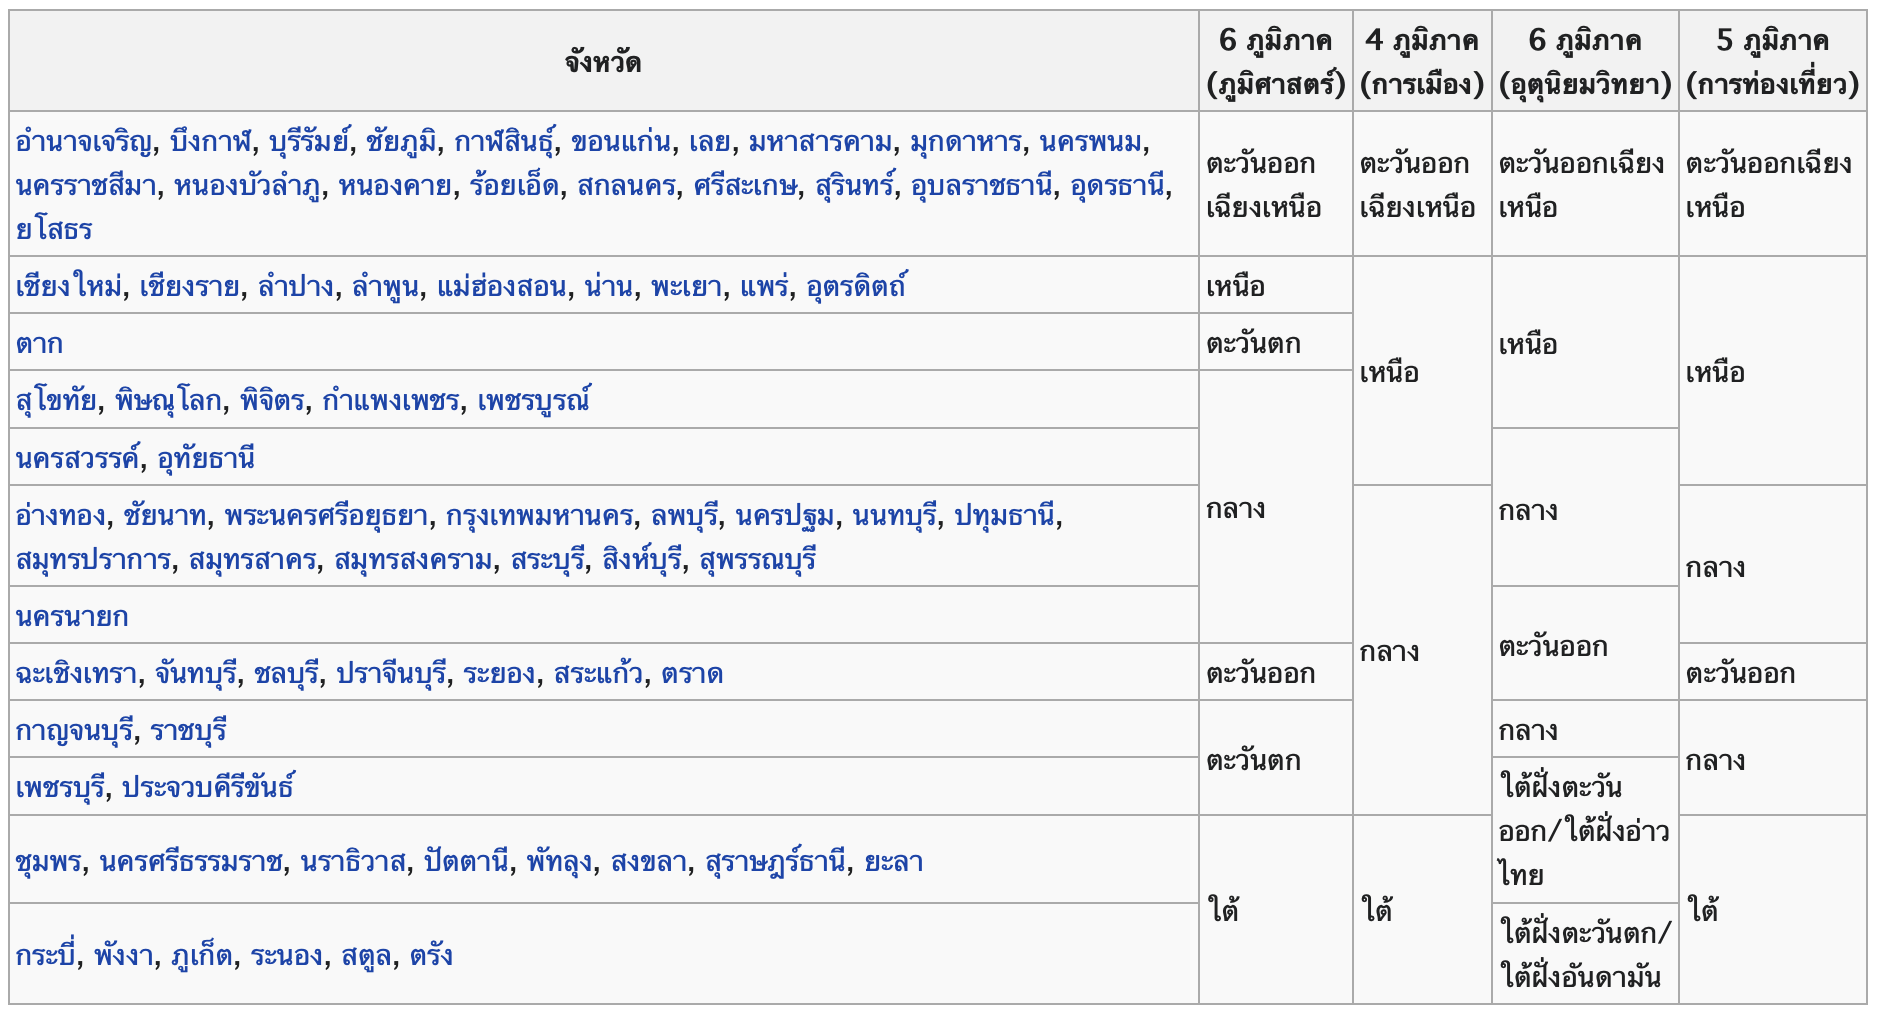

ตอบคำถามต่อไปนี้ (โดยแสดงของการจัดภูมิภาคทั้ง 4 แบบ ภูมิศาสตร์ การเมือง อุตุนิยมวิทยา และ การท่องเที่ยว)
**คะแนนเต็ม 100 คะแนน โดยคะแนน
Midterm คิดเป็น 30% ของคะแนนทั้งหมด**

เตรียมข้อมูล (20 คะแนน)

1. อายุของผู้ป่วยคนแรกในแต่ละภูมิภาค (เหนือ, กลาง, ใต้, ...) (20 คะแนน)

2. เปรียบเทียบจำนวนผู้ป่วยในแต่ละภูมิภาค (ภูมิภาคใดมีจำนวนผู้ป่วยมากที่สุด และ น้อยที่สุด) (20 คะแนน)

3. แสดง Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของแต่ละภูมิภาค (20 คะแนน)

4. สร้างตารางอายุเฉลี่ยของผู้ติดเชื้อโควิดของแต่ละจังหวัด (province of onset) (20 คะแนน)

5. สร้างตารางอายุเฉลี่ยของผู้ติดเชื้อโควิดของแต่ละภูมิภาค (20 คะแนน)

มีอะไรสามารถโพสสอบถามได้ใน facebook group ภายใต้โพสของข้อสอบนี้

(คะแนน midterm เป็นคะแนนกลุ่ม)

# เตรียมข้อมูล (20 คะแนน)

## ข้อมูลจากตาราง confirmed_case.xlsx

In [1]:
import pandas as pd    # pandas เป็น Package ที่ใช้เกี่ยวกับการจัดการข้อมูลที่เป็นตาราง , เรียกใช้โดยการ import แล้วตามด้วยชื่อ Package
import os    # เป็น package ที่เอาไว้จัดการไฟล์และเอาไว้ดูที่มาของไฟล์หรือ path

In [2]:
from google.colab import drive    # เชื่อมต่อกับ google drive ที่เราเก็บข้อมูลไว้
drive.mount('/content/drive')
path = '/content/drive/My Drive/midterm data 2022'    #ระบุให้ชี้ไปที่โฟลเดอร์ใน google drive ที่เราเซฟไฟล์ไว้ คือ โฟลเดอร์ midterm data 2022

Mounted at /content/drive


In [3]:
data_file_path = os.path.join(path,'confirmed-cases.xlsx')    # ไฟล์ที่เราต้องการ
data = pd.read_excel(data_file_path)       # .read_excel อ่านไฟล์ที่เป็นexcel

In [4]:
data   # ดูหน้าตาข้อมูลว่าเป็นยังไง

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,2020-01-17,NaT,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,2020-01-22,NaT,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,2020-01-22,NaT,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,2020-01-24,NaT,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
816984,816985,2021-08-11,2021-08-10,หญิง,8.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา
816985,816986,2021-08-11,2021-08-10,ชาย,14.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา
816986,816987,2021-08-11,2021-08-10,ชาย,59.0,ปี,Thailand,สระแก้ว,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,สระแก้ว,อรัญประเทศ
816987,816988,2021-08-11,2021-08-10,หญิง,34.0,ปี,Thailand,สระแก้ว,อื่นๆ,กรุงเทพมหานคร,บางขุนเทียน


In [5]:
data.head()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,2020-01-17,NaT,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,2020-01-22,NaT,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,2020-01-22,NaT,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,2020-01-24,NaT,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN


In [6]:
data.shape  #ดูขนาดของข้อมูล

(816989, 11)

### ตรวจสอบค่าใน column

#### ตรวจสอบค่า missing

In [7]:
data.isnull()   # ตรงไหนเป็นช่องว่างจะขึ้น True ตรงไหนไม่เป็นช่องว่าวจะขึ้น False

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,False,False,True,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
816984,False,False,False,False,False,False,False,False,False,False,False
816985,False,False,False,False,False,False,False,False,False,False,False
816986,False,False,False,False,False,False,False,False,False,False,False
816987,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().any()   #ดูว่าคอลัมน์ไหนมีค่า missing บ้าง

No.                      False
announce_date            False
Notified date             True
sex                       True
age                       True
Unit                      True
nationality               True
province_of_isolation     True
risk                      True
province_of_onset         True
district_of_onset         True
dtype: bool

#### แก้ค่า Missing ของคอลัมน์ 'age'

In [9]:
data[['age']].mean()       # แทนค่า Missing ของคอลัมน์ 'age' ด้วยค่า mean ของ 'age'

age    35.67704
dtype: float64

In [10]:
avg_age = data[['age']].mean() 
data[['age']] = data[['age']].fillna(avg_age)      # แทนค่าเฉลี่ยของอายุลงไปในค่าว่าง

In [11]:
data.isnull().any() # ดูว่าคอลัมน์ไหนมีค่า missing บ้าง จะเห็นว่าคอลัมน์ 'age' เป็น False นั่นคือไม่มีค่า missing

No.                      False
announce_date            False
Notified date             True
sex                       True
age                      False
Unit                      True
nationality               True
province_of_isolation     True
risk                      True
province_of_onset         True
district_of_onset         True
dtype: bool

#### แก้ค่า Missing ของคอลัมน์ 'risk'

In [12]:
data[['risk']] = data[['risk']].fillna('ไม่มีข้อมูล')       # แทนค่า Missing ของคอลัมน์ 'risk' ด้วย 'ไม่มีข้อมูล'

In [13]:
data.isnull().any()       # ดูว่าคอลัมน์ไหนมีค่า missing บ้าง จะเห็นว่าคอลัมน์ 'risk' เป็น False นั่นคือไม่มีค่า missing

No.                      False
announce_date            False
Notified date             True
sex                       True
age                      False
Unit                      True
nationality               True
province_of_isolation     True
risk                     False
province_of_onset         True
district_of_onset         True
dtype: bool

In [14]:
set(data['risk'])      # ลองดู set ข้อมูลของคอลัมน์ 'risk'

{' Samui plus',
 'ACF รองเมือง',
 'ACF สนามกีฬาธูปะเตมีย์',
 'ACF สนามกีฬาไทย-ญี่ปุ่น',
 'ACF สีลม',
 'ACF เคหะหลักสี่',
 'Cluster Icon siam',
 "Cluster Memory 90's กรุงเทพมหานคร",
 'Cluster New Jazz กรุงเทพมหานคร',
 'Cluster The Lounge Salaya',
 'Cluster คลองเตย',
 'Cluster งานมอเตอร์ โชว์',
 'Cluster จนท. สนามบินสุวรรณภูมิ',
 'Cluster จันทบุรี',
 'Cluster จันทบุรี (ชาวกินี )',
 'Cluster จันทบุรี (ชาวกินี)',
 'Cluster ชลบุรี',
 'Cluster ชลบุรี บริษัทไดกิ้น',
 'Cluster ชลบุรี โรงเบียร์ 90',
 'Cluster ตราด',
 'Cluster ตราด ',
 'Cluster ตลาดนนทบุรี',
 'Cluster ตลาดบางพลี',
 'Cluster ตลาดบางแค',
 'Cluster ตลาดพรพัฒน์',
 'Cluster ตลาดสี่มุมเมือง',
 'Cluster บริษัทศรีสวัสดิ์',
 'Cluster บางแค',
 'Cluster บ่อนพัทยา/ชลบุรี',
 'Cluster บ่อนเทพารักษ์',
 'Cluster บ่อนไก่อ่างทอง',
 'Cluster ปากช่อง',
 'Cluster ผับ Thonglor',
 'Cluster มหาสารคาม',
 'Cluster ระยอง',
 'Cluster สถานบันเทิงย่านทองหล่อ',
 'Cluster สมุทรปราการ (โรงงาน บริษัทเมทัล โปรดักส์)',
 'Cluster สมุทรปราการ GRP Hightech',
 'Cluste

#### แก้ค่า Missing ของคอลัมน์ 'province_of_isolation'

In [15]:
# แทนค่า Missing ของคอลัมน์ 'province_of_isolation' ด้วย 'ไม่มีข้อมูล'
data[['province_of_isolation']] = data[['province_of_isolation']].fillna('ไม่มีข้อมูล')

In [16]:
data.isnull().any()  # ดูว่าคอลัมน์ไหนมีค่า missing บ้าง จะเห็นว่าคอลัมน์ 'province_of_isolation' เป็น False นั่นคือไม่มีค่า missing

No.                      False
announce_date            False
Notified date             True
sex                       True
age                      False
Unit                      True
nationality               True
province_of_isolation    False
risk                     False
province_of_onset         True
district_of_onset         True
dtype: bool

In [17]:
# ลองดู set ข้อมูลของคอลัมน์ 'province_of_isolation'
set(data['province_of_isolation'])

{'กระบี่',
 'กรุงเทพมหานคร',
 'กาญจนบุรี',
 'กาฬสินธุ์',
 'กำแพงเพชร',
 'ขอนแก่น',
 'จันทบุรี',
 'ฉะเชิงเทรา',
 'ชลบุรี',
 'ชัยนาท',
 'ชัยภูมิ',
 'ชุมพร',
 'ตรัง',
 'ตราด',
 'ตาก',
 'นครนายก',
 'นครปฐม',
 'นครพนม',
 'นครราชสีมา',
 'นครศรีธรรมราช',
 'นครสวรรค์',
 'นนทบุรี',
 'นราธิวาส',
 'น่าน',
 'บึงกาฬ',
 'บุรีรัมย์',
 'ปทุมธานี',
 'ประจวบคีรีขันธ์',
 'ปราจีนบุรี',
 'ปัตตานี',
 'พระนครศรีอยุธยา',
 'พะเยา',
 'พังงา',
 'พัทลุง',
 'พิจิตร',
 'พิษณุโลก',
 'ภูเก็ต',
 'มหาสารคาม',
 'มุกดาหาร',
 'ยะลา',
 'ยโสธร',
 'ระนอง',
 'ระยอง',
 'ราชบุรี',
 'ร้อยเอ็ด',
 'ลพบุรี',
 'ลำปาง',
 'ลำพูน',
 'ศรีสะเกษ',
 'สกลนคร',
 'สงขลา',
 'สตูล',
 'สมุทรปราการ',
 'สมุทรสงคราม',
 'สมุทรสาคร',
 'สระบุรี',
 'สระแก้ว',
 'สิงห์บุรี',
 'สุพรรณบุรี',
 'สุราษฎร์ธานี',
 'สุรินทร์',
 'สุโขทัย',
 'หนองคาย',
 'หนองบัวลำภู',
 'อำนาจเจริญ',
 'อุดรธานี',
 'อุตรดิตถ์',
 'อุทัยธานี',
 'อุบลราชธานี',
 'อ่างทอง',
 'เชียงราย',
 'เชียงใหม่',
 'เพชรบุรี',
 'เพชรบูรณ์',
 'เลย',
 'แพร่',
 'แม่ฮ่องสอน',
 'ไม่มีข้อมูล'}

#### แก้ค่า Missing ของคอลัมน์ 'province_of_onset'

In [18]:
# แทนค่า Missing ของคอลัมน์ 'province_of_onset' ด้วย 'ไม่มีข้อมูล'
data[['province_of_onset']] = data[['province_of_onset']].fillna('ไม่มีข้อมูล')

In [19]:
data.isnull().any() # ดูว่าคอลัมน์ไหนมีค่า missing บ้าง จะเห็นว่าคอลัมน์ 'province_of_onset' เป็น False นั่นคือไม่มีค่า missing

No.                      False
announce_date            False
Notified date             True
sex                       True
age                      False
Unit                      True
nationality               True
province_of_isolation    False
risk                     False
province_of_onset        False
district_of_onset         True
dtype: bool

In [20]:
set(data['province_of_onset'])     # ลองดู set ข้อมูลของคอลัมน์ 'province_of_onset'

{'\xa0กาญจนบุรี',
 '\xa0ชลบุรี',
 '\xa0ตราด',
 '\xa0นครปฐม',
 '\xa0สมุทรสงคราม',
 '\xa0สมุทรสาคร',
 '\xa0อุทัยธานี',
 'กทม',
 'กระบี่',
 'กรุงเทพมหานคร',
 'กัมพูชา',
 'กาญจนบุรี',
 'กาฬสินธิ์',
 'กาฬสินธุ์',
 'กาฬสินธ์',
 'กำแพงเพชร',
 'ขอนแก่น',
 'ขอนแก่่น',
 'ขัยนาท',
 'จันทบุรี',
 'ฉะเชิงเทรา',
 'ชมพร',
 'ชลบุรี',
 'ชลบุรี\t',
 'ชลบุุรี',
 'ชัยนาท',
 'ชัยภูมิ',
 'ชุมพร',
 'ชุุมพร',
 'ตรัง',
 'ตราด',
 'ตาก',
 'ท้ายบ้าน',
 'ธารโต',
 'นคนปฐม',
 'นคปฐม',
 'นครนาชสีมา',
 'นครนายก',
 'นครปฐม',
 'นครปบม',
 'นครพนม',
 'นครราชสีมา',
 'นครศรีธรรมราช',
 'นครศร๊ะรรมราช',
 'นครสวรรค์',
 'นตรปฐม',
 'นนทบุรี',
 'นราธิวาส',
 'นอกเขต',
 'นาราธิวาส',
 'นาวัง',
 'น่าน',
 'บางกะปิ',
 'บึงกาฬ',
 'บึงโขงหลง',
 'บุรีรัมย์',
 'บุรีรัมย์\xa0',
 'บุรีรัยม์',
 'บ้านหลวง',
 'ปทุมธานี',
 'ปทุมธานี.',
 'ปทุมธานีี',
 'ปทุุมธานี',
 'ปมุมธานี',
 'ประจวบคีรีขันธ์',
 'ประจวบฯ',
 'ปราจีนบุรี',
 'ปลวกแดง',
 'ปลายพระยา',
 'ปัตตานี',
 'ปัว',
 'ปุทมธานี',
 'พม่า',
 'พระนครศรีอยุธยา',
 'พะเยา',
 'พังงา',
 'พัทลุง',
 'พิจิต

In [21]:
data['province_of_onset'].replace({'\xa0กาญจนบุรี':'กาญจนบุรี','\xa0ชลบุรี':'ชลบุรี','\xa0ตราด':'ตราด','\xa0นครปฐม':'นครปฐม',
                                         '\xa0สมุทรสงคราม':'สมุทรสงคราม','\xa0อุทัยธานี':'อุทัยธานี','กทม':'กรุงเทพมหานคร','กาฬสินธิ์':'กาฬสินธุ์',
                                         'กาฬสินธ์':'กาฬสินธุ์','ขอนแก่่น':'ขอนแก่น','ชลบุรี\t':'ชลบุรี','ชุุมพร':'ชุมพร','ท้ายบ้าน':'สมุทรปราการ',
                                         'นครปบม':'นครปฐม','ธารโต':'ยะลา','นครศร๊ะรรมราช':'นครศรีธรรมราช','นตรปฐม':'นครปฐม','นาราธิวาส':'นราธิวาส',
                                         'นาวัง':'หนองบัวลำภู','บางกะปิ':'กรุงเทพมหานคร','บึงโขงหลง':'บึงกาฬ','บุรีรัมย์\xa0':'บุรีรัมย์','บุรีรัยม์':'บุรีรัมย์',
                                         'บ้านหลวง':'น่าน','ปทุมธานี.':'ปทุมธานี','ปทุมธานีี':'ปทุมธานี','ปทุุมธานี':'ปทุมธานี','ปมุมธานี':'ปทุมธานี',
                                         'ประจวบฯ':'ประจวบคีรีขันธ์','ปลวกแดง':'ระยอง','ปลายพระยา':'กระบี่','ปัว':'น่าน','ปุทมธานี':'ปทุมธานี',
                                         'พิษณูโลก':'พิษณุโลก','ภูเพียง':'น่าน','มหาสาคาม':'มหาสารคาม','ยานนาวา':'กรุงเทพมหานคร','ร้องกวาง':'แพร่',
                                         'ลอง':'แพร่','ลาดพร้าว':'กรุงเทพมหานคร','ลำลูกกา':'ปทุมธานี','วังชิ้น':'ลำปาง','ศรีษะเกษ':'ศรีสะเกษ',
                                         'สงขลา\u200b':'สงขลา','สมถทรปราการ':'สมุทรปราการ','สมทรสาคร':'สมุทรสาคร','สมุครปราการ':'สมุทรปราการ',
                                         'สมุทรปรากร':'สมุทรปราการ','สมุทรปรากรร':'สมุทรปราการ','สมุทราปราการ':'สมุทรปราการ','สมุทสงคราม':'สมุทรสงคราม',
                                         'สมุทสาคร':'สมุทรสาคร','สมุุทรปราการ':'สมุทรปราการ','สมุุทรสาคร':'สมุทรสาคร','สอง':'แพร่','สองแคว':'น่าน',
                                         'สะแก้ว':'สระแก้ว','สารภี':'เชียงใหม่','สุทรปราการ':'สมุทรปราการ','สุมทรสาคร':'สมุทรสาคร','สุราษฎร์์ธานี':'สุราษฎร์ธานี',
                                         'สุราษฏร์ธานี':'สุราษฎร์ธานี','สุุราษฎร์ธานี':'สุราษฎร์ธานี','สูงเม่น':'แพร่','หนองบััวลำภู':'หนองบัวลำภู','หนองม่วงไข่':'แพร่',
                                         'อยุทธยา':'พระนครศรีอยุธยา','อยุธยา':'พระนครศรีอยุธยา','อยุุธยา':'พระนครศรีอยุธยา','อุดรธานีี':'อุดรธานี','อุบลราขธานี':'อุบลราชธานี',
                                         'อุุดรธาน':'อุดรธานี','อุุดรธานี':'อุดรธานี','อุุตรดิตถ์':'อุตรดิตถ์','อุุทัยธานี':'อุทัยธานี','เชีียงราย':'เชียงราย','เด่นชัย':'แพร่',
                                         'เพชรบุูรณ์':'เพชรบูรณ์','เมือง':'แพร่','เมืองน่าน':'น่าน','เรือ':'เลย','เวียงสา':'น่าน','\xa0สมุทรสาคร':'สมุทรสาคร',
                                         'สุมทรปราการ':'สมุทรปราการ','สุมุทรปราการ':'สมุทรปราการ','สุมุทรสาคร':'สมุทรสาคร','ชลบุุรี':'ชลบุรี','นคนปฐม':'นครปฐม',
                                         'นคปฐม':'นครปฐม','ขัยนาท':'ชัยนาท','ชมพร':'ชุมพร','นครนาชสีมา':'นครราชสีมา'}, inplace=True)

# แก้ไขข้อมูลที่พิมพ์จังหวัดผิด ให้อยู่ในชื่อจังหวัดที่ถูกต้อง
# เปลี่ยนข้อมูลของคอลัมน์ 'province_of_onset' ให้เป็นชื่อจังหวัดทั้งหมด

In [22]:
set(data['province_of_onset'])     # ลองดู set ข้อมูลของคอลัมน์ 'province_of_onset' อีกครั้งหลังจากแก้ไขชื่อจังหวัดที่พิมพ์เสร็จ

{'กระบี่',
 'กรุงเทพมหานคร',
 'กัมพูชา',
 'กาญจนบุรี',
 'กาฬสินธุ์',
 'กำแพงเพชร',
 'ขอนแก่น',
 'จันทบุรี',
 'ฉะเชิงเทรา',
 'ชลบุรี',
 'ชัยนาท',
 'ชัยภูมิ',
 'ชุมพร',
 'ตรัง',
 'ตราด',
 'ตาก',
 'นครนายก',
 'นครปฐม',
 'นครพนม',
 'นครราชสีมา',
 'นครศรีธรรมราช',
 'นครสวรรค์',
 'นนทบุรี',
 'นราธิวาส',
 'นอกเขต',
 'น่าน',
 'บึงกาฬ',
 'บุรีรัมย์',
 'ปทุมธานี',
 'ประจวบคีรีขันธ์',
 'ปราจีนบุรี',
 'ปัตตานี',
 'พม่า',
 'พระนครศรีอยุธยา',
 'พะเยา',
 'พังงา',
 'พัทลุง',
 'พิจิตร',
 'พิษณุโลก',
 'ภูเก็ต',
 'มหาสารคาม',
 'มาเลเซีย',
 'มุกดาหาร',
 'ยะลา',
 'ยโสธร',
 'ระนอง',
 'ระยอง',
 'ราชบุรี',
 'ร้อยเอ็ด',
 'ลพบุรี',
 'ลำปาง',
 'ลำพูน',
 'ศรีสะเกษ',
 'สกลนคร',
 'สงขลา',
 'สตูล',
 'สถานที่ทำงาน',
 'สมุทรปราการ',
 'สมุทรสงคราม',
 'สมุทรสาคร',
 'สระบุรี',
 'สระแก้ว',
 'สิงห์บุรี',
 'สุพรรณบุรี',
 'สุราษฎร์ธานี',
 'สุรินทร์',
 'สุวรรณภูมิ',
 'สุโขทัย',
 'หนองคาย',
 'หนองบัวลำภู',
 'อำนาจเจริญ',
 'อุดรธานี',
 'อุตรดิตถ์',
 'อุทัยธานี',
 'อุบลราชธานี',
 'อ่างทอง',
 'อํานาจเจริญ',
 'เชียงราย',
 'เชียงให

In [23]:
data[['province_of_onset']] = data[['province_of_onset']].fillna('ไม่ระบุ')    # แทนค่า missing ในคอลัมน์ 'province_of_onset' ด้วย 'ไม่ระบุ'

In [24]:
data.isnull()      # ดูว่าแต่ละคอลัมน์มีค่า missing อยู่กี่ค่า

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,False,False,True,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
816984,False,False,False,False,False,False,False,False,False,False,False
816985,False,False,False,False,False,False,False,False,False,False,False
816986,False,False,False,False,False,False,False,False,False,False,False
816987,False,False,False,False,False,False,False,False,False,False,False


In [25]:
data.isnull().sum()   #ดูว่าคอลัมน์ไหนมีค่า missing บ้าง และมีกี่ค่า

No.                           0
announce_date                 0
Notified date              2795
sex                       53005
age                           0
Unit                      74637
nationality               82076
province_of_isolation         0
risk                          0
province_of_onset             0
district_of_onset        155300
dtype: int64

In [26]:
data # รันหน้าตาของข้อมูล data ออกมาดู

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,2020-01-17,NaT,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,2020-01-22,NaT,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,2020-01-22,NaT,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,2020-01-24,NaT,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
816984,816985,2021-08-11,2021-08-10,หญิง,8.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา
816985,816986,2021-08-11,2021-08-10,ชาย,14.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา
816986,816987,2021-08-11,2021-08-10,ชาย,59.0,ปี,Thailand,สระแก้ว,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,สระแก้ว,อรัญประเทศ
816987,816988,2021-08-11,2021-08-10,หญิง,34.0,ปี,Thailand,สระแก้ว,อื่นๆ,กรุงเทพมหานคร,บางขุนเทียน


## ข้อมูลจากตาราง

### สร้างตารางข้อมูลภูมิภาค (Data region)

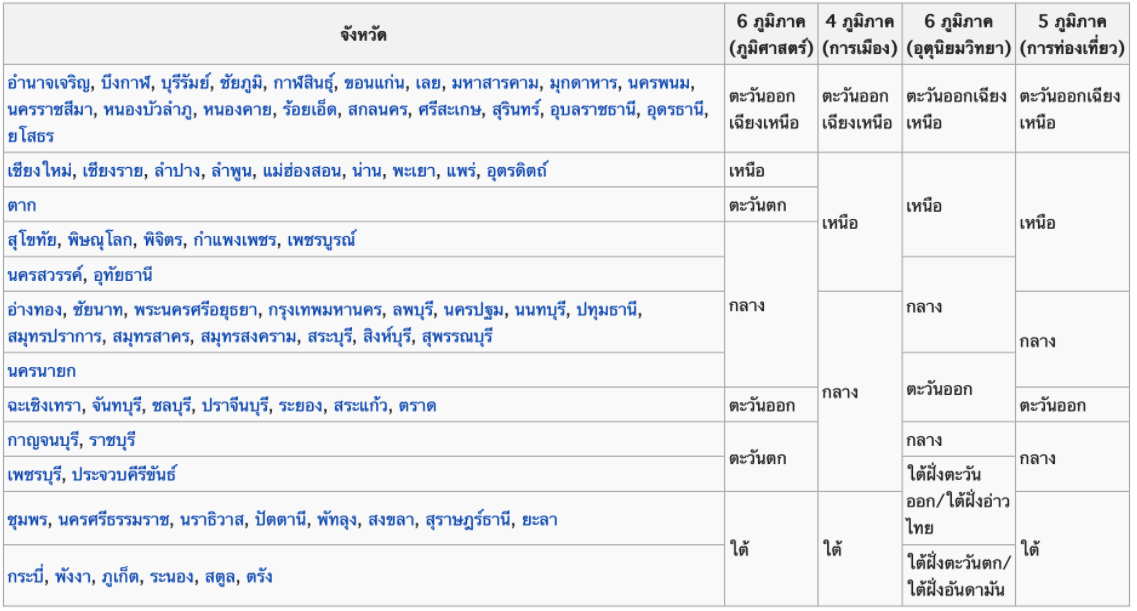

In [27]:
data_region = {'จังหวัด':['อำนาจเจริญ','บึงกาฬ','บุรีรัมย์','ชัยภูมิ','กาฬสินธุ์','ขอนแก่น','เลย','มหาสารคาม','มุกดาหาร','นครพนม','นครราชสีมา','หนองบัวลำภู','หนองคาย','ร้อยเอ็ด','สกลนคร','ศรีสะเกษ','สุรินทร์','อุบลราชธานี','อุดรธานี','ยโสธร','เชียงใหม่','เชียงราย','ลำปาง','ลำพูน','แม่ฮ่องสอน','น่าน','พะเยา','แพร่','อุตรดิตถ์','ตาก','สุโขทัย','พิษณุโลก','พิจิตร','กำแพงเพชร','เพชรบูรณ์','นครสวรรค์','อุทัยธานี','อ่างทอง','ชัยนาท','พระนครศรีอยุธยา','กรุงเทพมหานคร','ลพบุรี','นครปฐม','นนทบุรี','ปทุมธานี','สมุทรปราการ','สมุทรสาคร','สมุทรสงคราม','สระบุรี','สิงห์บุรี','สุพรรณบุรี','นครนายก','ฉะเชิงเทรา','จันทบุรี','ชลบุรี','ปราจีนบุรี','ระยอง','สระแก้ว','ตราด','กาญจนบุรี','ราชบุรี','เพชรบุรี','ประจวบคีรีขันธ์','ชุมพร','นครศรีธรรมราช','นราธิวาส','ปัตตานี','พัทลุง','สงขลา','สุราษฎร์ธานี','ยะลา','กระบี่','พังงา','ภูเก็ต','ระนอง','สตูล','ตรัง'],
             '6 ภูมิภาค (ภูมิศาสตร์)':['ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','ตะวันตก','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','ตะวันออก','ตะวันออก','ตะวันออก','ตะวันออก','ตะวันออก','ตะวันออก','ตะวันออก','ตะวันตก','ตะวันตก','ตะวันตก','ตะวันตก','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้'],
             '4 ภูมิภาค (การเมือง)':['ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้'],
             '6 ภูมิภาค (อุตุนิยมวิทยา)':['ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','ตะวันออก','ตะวันออก','ตะวันออก','ตะวันออก','ตะวันออก','ตะวันออก','ตะวันออก','ตะวันออก','กลาง','กลาง','ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน'],
             '5 ภูมิภาค (การท่องเที่ยว)':['ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','เหนือ','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','กลาง','ตะวันออก','ตะวันออก','ตะวันออก','ตะวันออก','ตะวันออก','ตะวันออก','ตะวันออก','กลาง','กลาง','กลาง','กลาง','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้','ใต้']
}

In [28]:
data_region = pd.DataFrame.from_dict(data_region)     # สร้างตารางข้อมูลภูมิภาค Data region
data_region   # ดูหน้าตาข้อมูลว่าเป็นยังไง

,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์),4 ภูมิภาค (การเมือง),6 ภูมิภาค (อุตุนิยมวิทยา),5 ภูมิภาค (การท่องเที่ยว)
0,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
1,บึงกาฬ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
2,บุรีรัมย์,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
3,ชัยภูมิ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
4,กาฬสินธุ์,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
...,...,...,...,...,...
72,พังงา,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
73,ภูเก็ต,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
74,ระนอง,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
75,สตูล,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้


## เชื่อมต่อตาราง data กับ data_region

In [29]:
# เชื่อมต่อตาราง data กับ data_region โดยใช้ จังหวัด กำหนดให้ตารางข้อมูล data เป็นตารางหลัก 
datacovid_region = data.merge(data_region,how='left', left_on='province_of_onset',right_on='จังหวัด')
datacovid_region

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์),4 ภูมิภาค (การเมือง),6 ภูมิภาค (อุตุนิยมวิทยา),5 ภูมิภาค (การท่องเที่ยว)
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง
1,2,2020-01-17,NaT,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง
2,3,2020-01-22,NaT,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,นครปฐม,กลาง,กลาง,กลาง,กลาง
3,4,2020-01-22,NaT,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง
4,5,2020-01-24,NaT,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816984,816985,2021-08-11,2021-08-10,หญิง,8.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา,สระแก้ว,ตะวันออก,กลาง,ตะวันออก,ตะวันออก
816985,816986,2021-08-11,2021-08-10,ชาย,14.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา,สระแก้ว,ตะวันออก,กลาง,ตะวันออก,ตะวันออก
816986,816987,2021-08-11,2021-08-10,ชาย,59.0,ปี,Thailand,สระแก้ว,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,สระแก้ว,อรัญประเทศ,สระแก้ว,ตะวันออก,กลาง,ตะวันออก,ตะวันออก
816987,816988,2021-08-11,2021-08-10,หญิง,34.0,ปี,Thailand,สระแก้ว,อื่นๆ,กรุงเทพมหานคร,บางขุนเทียน,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง


# 1. อายุของผู้ป่วยคนแรกในแต่ละภูมิภาค (เหนือ, กลาง, ใต้, ...) (20 คะแนน)

## แบ่งตามภูมิศาสตร์

In [111]:
data1 = datacovid_region[['No.','announce_date','Notified date','sex','age','Unit','nationality','province_of_isolation','risk','province_of_onset','district_of_onset','จังหวัด','6 ภูมิภาค (ภูมิศาสตร์)']]
data1 # เลือกมาเฉพาะคอมลัมน์ที่ต้องการ คือ No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด และ 6 ภูมิภาค (ภูมิศาสตร์)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์)
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
1,2,2020-01-17,NaT,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
2,3,2020-01-22,NaT,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,นครปฐม,กลาง
3,4,2020-01-22,NaT,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
4,5,2020-01-24,NaT,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
...,...,...,...,...,...,...,...,...,...,...,...,...,...
816984,816985,2021-08-11,2021-08-10,หญิง,8.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา,สระแก้ว,ตะวันออก
816985,816986,2021-08-11,2021-08-10,ชาย,14.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา,สระแก้ว,ตะวันออก
816986,816987,2021-08-11,2021-08-10,ชาย,59.0,ปี,Thailand,สระแก้ว,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,สระแก้ว,อรัญประเทศ,สระแก้ว,ตะวันออก
816987,816988,2021-08-11,2021-08-10,หญิง,34.0,ปี,Thailand,สระแก้ว,อื่นๆ,กรุงเทพมหานคร,บางขุนเทียน,กรุงเทพมหานคร,กลาง


In [112]:
set(datacovid_region['6 ภูมิภาค (ภูมิศาสตร์)'])   # ลองดู set ข้อมูลของคอลัมน์ '6 ภูมิภาค (ภูมิศาสตร์)'

{nan, 'กลาง', 'ตะวันตก', 'ตะวันออก', 'ตะวันออกเฉียงเหนือ', 'เหนือ', 'ใต้'}

In [113]:
data1_1 = data1[data1['6 ภูมิภาค (ภูมิศาสตร์)']=='กลาง']    # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (ภูมิศาสตร์)' = 'กลาง' นั่นคือ แบ่งตามภูมิศาสตร์แล้วคือภาคกลาง
data1_1.head(1)    # พบว่าอายุของผู้ป่วยคนแรกในภาคกลางเมื่อแบ่งภูมิภาคตามภูมิศาสตร์ คือ 61.0 ปี

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์)
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง


In [114]:
data1_2 = data1[data1['6 ภูมิภาค (ภูมิศาสตร์)']=='ตะวันตก']    # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (ภูมิศาสตร์)' = 'ตะวันตก' นั่นคือ แบ่งตามภูมิศาสตร์แล้วคือภาคตะวันตก
data1_2.head(1)      # พบว่าอายุของผู้ป่วยคนแรกในภาคตะวันตกเมื่อแบ่งภูมิภาคตามภูมิศาสตร์ คือ 73.0 ปี

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์)
7,8,2020-01-26,NaT,หญิง,73.0,ปี,China,ประจวบคีรีขันธ์,คนต่างชาติเดินทางมาจากต่างประเทศ,ประจวบคีรีขันธ์,หัวหิน,ประจวบคีรีขันธ์,ตะวันตก


In [115]:
data1_3 = data1[data1['6 ภูมิภาค (ภูมิศาสตร์)']=='ตะวันออก']     # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (ภูมิศาสตร์)' = 'ตะวันออก' นั่นคือ แบ่งตามภูมิศาสตร์แล้วคือภาคตะวันออก
data1_3.head(1)     # พบว่าอายุของผู้ป่วยคนแรกในภาคตะวันออกเมื่อแบ่งภูมิภาคตามภูมิศาสตร์ คือ 24.0 ปี

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์)
31,32,2020-02-08,NaT,ชาย,24.0,ปี,Thailand,ชลบุรี,State Quarantine,ชลบุรี,NaN,ชลบุรี,ตะวันออก


In [116]:
data1_4 = data1[data1['6 ภูมิภาค (ภูมิศาสตร์)']=='ตะวันออกเฉียงเหนือ']    # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (ภูมิศาสตร์)' = 'ตะวันออกเฉียงเหนือ' นั่นคือ แบ่งตามภูมิศาสตร์แล้วคือภาคตะวันออกเฉียงเหนือ
data1_4.head(1)     # พบว่าอายุของผู้ป่วยคนแรกในภาคตะวันออกเฉียงเหนือเมื่อแบ่งภูมิภาคตามภูมิศาสตร์ คือ 33.0 ปี

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์)
181,182,2020-03-18,2020-03-15,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง,ขอนแก่น,ตะวันออกเฉียงเหนือ


In [117]:
data1_5 = data1[data1['6 ภูมิภาค (ภูมิศาสตร์)']=='เหนือ']    # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (ภูมิศาสตร์)' = 'เหนือ' นั่นคือ แบ่งตามภูมิศาสตร์แล้วคือภาคเหนือ
data1_5.head(1)    # พบว่าอายุของผู้ป่วยคนแรกในภาคเหนือเมื่อแบ่งภูมิภาคตามภูมิศาสตร์ คือ 28.0 ปี

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์)
16,17,2020-01-31,NaT,ชาย,28.0,ปี,China,เชียงใหม่,คนต่างชาติเดินทางมาจากต่างประเทศ,เชียงใหม่,หางดง,เชียงใหม่,เหนือ


In [118]:
data1_6 = data1[data1['6 ภูมิภาค (ภูมิศาสตร์)']=='ใต้']      # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (ภูมิศาสตร์)' = 'ใต้' นั่นคือ แบ่งตามภูมิศาสตร์แล้วคือภาคใต้
data1_6.head(1)      # พบว่าอายุของผู้ป่วยคนแรกในภาคใต้เมื่อแบ่งภูมิภาคตามภูมิศาสตร์ คือ 32.0 ปี

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์)
13,14,2020-01-28,NaT,หญิง,32.0,ปี,China,ภูเก็ต,คนต่างชาติเดินทางมาจากต่างประเทศ,ภูเก็ต,เมือง,ภูเก็ต,ใต้


## แบ่งตามการเมือง

In [119]:
data2 = datacovid_region[['No.','announce_date','Notified date','sex','age','Unit','nationality','province_of_isolation','risk','province_of_onset','district_of_onset','จังหวัด','4 ภูมิภาค (การเมือง)']]
data2 # เลือกมาเฉพาะคอมลัมน์ที่ต้องการ คือ No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด และ4 ภูมิภาค (การเมือง)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,4 ภูมิภาค (การเมือง)
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
1,2,2020-01-17,NaT,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
2,3,2020-01-22,NaT,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,นครปฐม,กลาง
3,4,2020-01-22,NaT,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
4,5,2020-01-24,NaT,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
...,...,...,...,...,...,...,...,...,...,...,...,...,...
816984,816985,2021-08-11,2021-08-10,หญิง,8.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา,สระแก้ว,กลาง
816985,816986,2021-08-11,2021-08-10,ชาย,14.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา,สระแก้ว,กลาง
816986,816987,2021-08-11,2021-08-10,ชาย,59.0,ปี,Thailand,สระแก้ว,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,สระแก้ว,อรัญประเทศ,สระแก้ว,กลาง
816987,816988,2021-08-11,2021-08-10,หญิง,34.0,ปี,Thailand,สระแก้ว,อื่นๆ,กรุงเทพมหานคร,บางขุนเทียน,กรุงเทพมหานคร,กลาง


In [120]:
set(datacovid_region['4 ภูมิภาค (การเมือง)'])    # ลองดู set ข้อมูลของคอลัมน์ '4 ภูมิภาค (การเมือง)'

{nan, 'กลาง', 'ตะวันออกเฉียงเหนือ', 'เหนือ', 'ใต้'}

In [121]:
data2_1 = data2[data2['4 ภูมิภาค (การเมือง)']=='กลาง']     # เลือกข้อมูลจากคอลัมน์ '4 ภูมิภาค (การเมือง)' = 'กลาง' นั่นคือ แบ่งตามการเมืองแล้วคือภาคกลาง
data2_1.head(1)    # พบว่าอายุของผู้ป่วยคนแรกในภาคกลางเมื่อแบ่งภูมิภาคตามการเมือง คือ 61.0 ปี

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,4 ภูมิภาค (การเมือง)
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง


In [122]:
data2_2 = data2[data2['4 ภูมิภาค (การเมือง)']=='ตะวันออกเฉียงเหนือ']    # เลือกข้อมูลจากคอลัมน์ '4 ภูมิภาค (การเมือง)' = 'ตะวันออกเฉียงเหนือ' นั่นคือ แบ่งตามการเมืองแล้วคือภาคตะวันออกเฉียงเหนือ
data2_2.head(1)    # พบว่าอายุของผู้ป่วยคนแรกในภาคตะวันออกเฉียงเหนือเมื่อแบ่งภูมิภาคตามการเมือง คือ 33.0 ปี

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,4 ภูมิภาค (การเมือง)
181,182,2020-03-18,2020-03-15,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง,ขอนแก่น,ตะวันออกเฉียงเหนือ


In [123]:
data2_3 = data2[data2['4 ภูมิภาค (การเมือง)']=='เหนือ']     # เลือกข้อมูลจากคอลัมน์ '4 ภูมิภาค (การเมือง)' = 'เหนือ' นั่นคือ แบ่งตามการเมืองแล้วคือภาคเหนือ
data2_3.head(1)      # พบว่าอายุของผู้ป่วยคนแรกในภาคเหนือเมื่อแบ่งภูมิภาคตามการเมือง คือ 28.0 ปี

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,4 ภูมิภาค (การเมือง)
16,17,2020-01-31,NaT,ชาย,28.0,ปี,China,เชียงใหม่,คนต่างชาติเดินทางมาจากต่างประเทศ,เชียงใหม่,หางดง,เชียงใหม่,เหนือ


In [124]:
data2_4 = data2[data2['4 ภูมิภาค (การเมือง)']=='ใต้']   # เลือกข้อมูลจากคอลัมน์ '4 ภูมิภาค (การเมือง)' = 'ใต้' นั่นคือ แบ่งตามการเมืองแล้วคือภาคใต้
data2_4.head(1)   # พบว่าอายุของผู้ป่วยคนแรกในภาคใต้เมื่อแบ่งภูมิภาคตามการเมือง คือ 32.0 ปี

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,4 ภูมิภาค (การเมือง)
13,14,2020-01-28,NaT,หญิง,32.0,ปี,China,ภูเก็ต,คนต่างชาติเดินทางมาจากต่างประเทศ,ภูเก็ต,เมือง,ภูเก็ต,ใต้


## อุตุนิยมวิทยา

In [125]:
data3 = datacovid_region[['No.','announce_date','Notified date','sex','age','Unit','nationality','province_of_isolation','risk','province_of_onset','district_of_onset','จังหวัด','6 ภูมิภาค (อุตุนิยมวิทยา)']]
data3 # เลือกมาเฉพาะคอมลัมน์ที่ต้องการ คือ No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด และ6 ภูมิภาค (อุตุนิยมวิทยา)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (อุตุนิยมวิทยา)
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
1,2,2020-01-17,NaT,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
2,3,2020-01-22,NaT,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,นครปฐม,กลาง
3,4,2020-01-22,NaT,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
4,5,2020-01-24,NaT,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
...,...,...,...,...,...,...,...,...,...,...,...,...,...
816984,816985,2021-08-11,2021-08-10,หญิง,8.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา,สระแก้ว,ตะวันออก
816985,816986,2021-08-11,2021-08-10,ชาย,14.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา,สระแก้ว,ตะวันออก
816986,816987,2021-08-11,2021-08-10,ชาย,59.0,ปี,Thailand,สระแก้ว,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,สระแก้ว,อรัญประเทศ,สระแก้ว,ตะวันออก
816987,816988,2021-08-11,2021-08-10,หญิง,34.0,ปี,Thailand,สระแก้ว,อื่นๆ,กรุงเทพมหานคร,บางขุนเทียน,กรุงเทพมหานคร,กลาง


In [126]:
set(datacovid_region['6 ภูมิภาค (อุตุนิยมวิทยา)'])   # ลองดู set ข้อมูลของคอลัมน์ '6 ภูมิภาค (อุตุนิยมวิทยา)'

{nan,
 'กลาง',
 'ตะวันออก',
 'ตะวันออกเฉียงเหนือ',
 'เหนือ',
 'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน',
 'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย'}

In [127]:
data3_1 = data3[data3['6 ภูมิภาค (อุตุนิยมวิทยา)']=='กลาง']    # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (อุตุนิยมวิทยา)' = 'กลาง' นั่นคือ แบ่งตามอุตุนิยมวิทยาแล้วคือภาคกลาง
data3_1.head(1)      # พบว่าอายุของผู้ป่วยคนแรกในภาคกลางเมื่อแบ่งภูมิภาคตามอุตุนิยมวิทยา คือ 61.0 ปี

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (อุตุนิยมวิทยา)
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง


In [128]:
data3_2 = data3[data3['6 ภูมิภาค (อุตุนิยมวิทยา)']=='ตะวันออก']     # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (อุตุนิยมวิทยา)' = 'ตะวันออก' นั่นคือ แบ่งตามอุตุนิยมวิทยาแล้วคือภาคตะวันออก
data3_2.head(1)     # พบว่าอายุของผู้ป่วยคนแรกในภาคตะวันออกเมื่อแบ่งภูมิภาคตามอุตุนิยมวิทยา คือ 24.0 ปี

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (อุตุนิยมวิทยา)
31,32,2020-02-08,NaT,ชาย,24.0,ปี,Thailand,ชลบุรี,State Quarantine,ชลบุรี,NaN,ชลบุรี,ตะวันออก


In [129]:
data3_3 = data3[data3['6 ภูมิภาค (อุตุนิยมวิทยา)']=='ตะวันออกเฉียงเหนือ']    # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (อุตุนิยมวิทยา)' = 'ตะวันออกเฉียงเหนือ' นั่นคือ แบ่งตามอุตุนิยมวิทยาแล้วคือภาคตะวันออกเฉียงเหนือ
data3_3.head(1)     # พบว่าอายุของผู้ป่วยคนแรกในภาคตะวันออกเฉียงเหนือเมื่อแบ่งภูมิภาคตามอุตุนิยมวิทยา คือ 33.0 ปี

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (อุตุนิยมวิทยา)
181,182,2020-03-18,2020-03-15,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง,ขอนแก่น,ตะวันออกเฉียงเหนือ


In [130]:
data3_4 = data3[data3['6 ภูมิภาค (อุตุนิยมวิทยา)']=='เหนือ']    # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (อุตุนิยมวิทยา)' = 'เหนือ' นั่นคือ แบ่งตามอุตุนิยมวิทยาแล้วคือภาคเหนือ
data3_4.head(1)      # พบว่าอายุของผู้ป่วยคนแรกในภาคเหนือเมื่อแบ่งภูมิภาคตามอุตุนิยมวิทยา คือ 28.0 ปี

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (อุตุนิยมวิทยา)
16,17,2020-01-31,NaT,ชาย,28.0,ปี,China,เชียงใหม่,คนต่างชาติเดินทางมาจากต่างประเทศ,เชียงใหม่,หางดง,เชียงใหม่,เหนือ


In [131]:
data3_5 = data3[data3['6 ภูมิภาค (อุตุนิยมวิทยา)']=='ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน']    # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (อุตุนิยมวิทยา)' = 'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน' นั่นคือ แบ่งตามอุตุนิยมวิทยาแล้วคือภาคใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน
data3_5.head(1)    # พบว่าอายุของผู้ป่วยคนแรกในภาคใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามันเมื่อแบ่งภูมิภาคตามอุตุนิยมวิทยา คือ 32.0 ปี

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (อุตุนิยมวิทยา)
13,14,2020-01-28,NaT,หญิง,32.0,ปี,China,ภูเก็ต,คนต่างชาติเดินทางมาจากต่างประเทศ,ภูเก็ต,เมือง,ภูเก็ต,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน


In [132]:
data3_6 = data3[data3['6 ภูมิภาค (อุตุนิยมวิทยา)']=='ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย']     # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (อุตุนิยมวิทยา)' = 'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย' นั่นคือ แบ่งตามอุตุนิยมวิทยาแล้วคือภาคใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย
data3_6.head(1)      # พบว่าอายุของผู้ป่วยคนแรกในภาคใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทยเมื่อแบ่งภูมิภาคตามอุตุนิยมวิทยา คือ 73.0 ปี

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (อุตุนิยมวิทยา)
7,8,2020-01-26,NaT,หญิง,73.0,ปี,China,ประจวบคีรีขันธ์,คนต่างชาติเดินทางมาจากต่างประเทศ,ประจวบคีรีขันธ์,หัวหิน,ประจวบคีรีขันธ์,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย


## การท่องเที่ยว

In [133]:
data4 = datacovid_region[['No.','announce_date','Notified date','sex','age','Unit','nationality','province_of_isolation','risk','province_of_onset','district_of_onset','จังหวัด','5 ภูมิภาค (การท่องเที่ยว)']]
data4 # เลือกมาเฉพาะคอมลัมน์ที่ต้องการ คือ No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด และ5 ภูมิภาค (การท่องเที่ยว)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,5 ภูมิภาค (การท่องเที่ยว)
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
1,2,2020-01-17,NaT,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
2,3,2020-01-22,NaT,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,นครปฐม,กลาง
3,4,2020-01-22,NaT,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
4,5,2020-01-24,NaT,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
...,...,...,...,...,...,...,...,...,...,...,...,...,...
816984,816985,2021-08-11,2021-08-10,หญิง,8.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา,สระแก้ว,ตะวันออก
816985,816986,2021-08-11,2021-08-10,ชาย,14.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา,สระแก้ว,ตะวันออก
816986,816987,2021-08-11,2021-08-10,ชาย,59.0,ปี,Thailand,สระแก้ว,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,สระแก้ว,อรัญประเทศ,สระแก้ว,ตะวันออก
816987,816988,2021-08-11,2021-08-10,หญิง,34.0,ปี,Thailand,สระแก้ว,อื่นๆ,กรุงเทพมหานคร,บางขุนเทียน,กรุงเทพมหานคร,กลาง


In [134]:
set(datacovid_region['5 ภูมิภาค (การท่องเที่ยว)'])   # ลองดู set ข้อมูลของคอลัมน์ '5 ภูมิภาค (การท่องเที่ยว)'

{nan, 'กลาง', 'ตะวันออก', 'ตะวันออกเฉียงเหนือ', 'เหนือ', 'ใต้'}

In [135]:
data4_1 = data4[data4['5 ภูมิภาค (การท่องเที่ยว)']=='กลาง']     # เลือกข้อมูลจากคอลัมน์ '5 ภูมิภาค (การท่องเที่ยว)' = 'กลาง' นั่นคือ แบ่งตามการท่องเที่ยวแล้วคือภาคกลาง
data4_1.head(1)     # พบว่าอายุของผู้ป่วยคนแรกในภาคกลางเมื่อแบ่งภูมิภาคตามการท่องเที่ยว คือ 61.0 ปี

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,5 ภูมิภาค (การท่องเที่ยว)
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง


In [136]:
data4_2 = data4[data4['5 ภูมิภาค (การท่องเที่ยว)']=='ตะวันออก']    # เลือกข้อมูลจากคอลัมน์ '5 ภูมิภาค (การท่องเที่ยว)' = 'ตะวันออก' นั่นคือ แบ่งตามการท่องเที่ยวแล้วคือภาคตะวันออก
data4_2.head(1)    # พบว่าอายุของผู้ป่วยคนแรกในภาคตะวันออกเมื่อแบ่งภูมิภาคตามการท่องเที่ยว คือ 24.0 ปี

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,5 ภูมิภาค (การท่องเที่ยว)
31,32,2020-02-08,NaT,ชาย,24.0,ปี,Thailand,ชลบุรี,State Quarantine,ชลบุรี,NaN,ชลบุรี,ตะวันออก


In [137]:
data4_3 = data4[data4['5 ภูมิภาค (การท่องเที่ยว)']=='ตะวันออกเฉียงเหนือ']    # เลือกข้อมูลจากคอลัมน์ '5 ภูมิภาค (การท่องเที่ยว)' = 'ตะวันออกเฉียงเหนือ' นั่นคือ แบ่งตามการท่องเที่ยวแล้วคือภาคตะวันออกเฉียงเหนือ
data4_3.head(1)     # พบว่าอายุของผู้ป่วยคนแรกในภาคตะวันออกเฉียงเหนือเมื่อแบ่งภูมิภาคตามการท่องเที่ยว คือ 33.0 ปี

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,5 ภูมิภาค (การท่องเที่ยว)
181,182,2020-03-18,2020-03-15,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง,ขอนแก่น,ตะวันออกเฉียงเหนือ


In [138]:
data4_4 = data4[data4['5 ภูมิภาค (การท่องเที่ยว)']=='เหนือ']     # เลือกข้อมูลจากคอลัมน์ '5 ภูมิภาค (การท่องเที่ยว)' = 'เหนือ' นั่นคือ แบ่งตามการท่องเที่ยวแล้วคือภาคเหนือ
data4_4.head(1)   # พบว่าอายุของผู้ป่วยคนแรกในภาคเหนือเมื่อแบ่งภูมิภาคตามการท่องเที่ยว คือ 28.0 ปี

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,5 ภูมิภาค (การท่องเที่ยว)
16,17,2020-01-31,NaT,ชาย,28.0,ปี,China,เชียงใหม่,คนต่างชาติเดินทางมาจากต่างประเทศ,เชียงใหม่,หางดง,เชียงใหม่,เหนือ


In [139]:
data4_5 = data4[data4['5 ภูมิภาค (การท่องเที่ยว)']=='ใต้']    # เลือกข้อมูลจากคอลัมน์ '5 ภูมิภาค (การท่องเที่ยว)' = 'ใต้' นั่นคือ แบ่งตามการท่องเที่ยวแล้วคือภาคใต้
data4_5.head(1)   # พบว่าอายุของผู้ป่วยคนแรกในภาคใต้เมื่อแบ่งภูมิภาคตามการท่องเที่ยว คือ 32.0 ปี

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,5 ภูมิภาค (การท่องเที่ยว)
13,14,2020-01-28,NaT,หญิง,32.0,ปี,China,ภูเก็ต,คนต่างชาติเดินทางมาจากต่างประเทศ,ภูเก็ต,เมือง,ภูเก็ต,ใต้


# 2. เปรียบเทียบจำนวนผู้ป่วยในแต่ละภูมิภาค (ภูมิภาคใดมีจำนวนผู้ป่วยมากที่สุด และ น้อยที่สุด) (20 คะแนน)

## แบ่งตามภูมิศาสตร์

In [140]:
datacovid_region.groupby('6 ภูมิภาค (ภูมิศาสตร์)')[['No.']].count().sort_values('No.',ascending=False) # false คือเรียงข้อมูลจากมากไปน้อย
# จากการจัดกลุ่มภูมิภาคตามภูมิศาสตร์จะเห็นได้ว่าภาคกลางมีจำนวนผู้ป่วยมากที่สุดเท่ากับ 479357 
# และภาคเหนือมีจำนวนผู้ป่วยน้อยที่สุดเท่ากับ 14805

,No.
6 ภูมิภาค (ภูมิศาสตร์),
กลาง,479357
ตะวันออก,83587
ใต้,65947
ตะวันออกเฉียงเหนือ,38426
ตะวันตก,37696
เหนือ,14805


In [141]:
data_Gr1 = datacovid_region.groupby('6 ภูมิภาค (ภูมิศาสตร์)')['No.'].count().agg([max, min]) 
data_Gr1 # ดูค่ามากที่สุดและน้อยที่สุด
# จากการจัดกลุ่มภูมิภาคตามภูมิศาสตร์จะเห็นได้ว่าภาคกลางมีจำนวนผู้ป่วยมากที่สุดเท่ากับ 479357 
# และภาคเหนือมีจำนวนผู้ป่วยน้อยที่สุดเท่ากับ 14805

max    479357
min     14805
Name: No., dtype: int64

## แบ่งตามการเมือง

In [142]:
datacovid_region.groupby('4 ภูมิภาค (การเมือง)')[['No.']].count().sort_values('No.',ascending=False)
# จากการจัดกลุ่มภูมิภาคตามการเมืองจะเห็นได้ว่าภาคกลางมีจำนวนผู้ป่วยมากที่สุดเท่ากับ 572154 
# และภาคตะวันออกเฉียงเหนือมีจำนวนผู้ป่วยน้อยที่สุดเท่ากับ 38426

,No.
4 ภูมิภาค (การเมือง),
กลาง,572154
ใต้,65947
เหนือ,43291
ตะวันออกเฉียงเหนือ,38426


In [143]:
data_Gr2 = datacovid_region.groupby('4 ภูมิภาค (การเมือง)')['No.'].count().agg([max, min]) 
data_Gr2 # ดูค่ามากที่สุดและน้อยที่สุด
# จากการจัดกลุ่มภูมิภาคตามการเมืองจะเห็นได้ว่าภาคกลางมีจำนวนผู้ป่วยมากที่สุดเท่ากับ 572154 
# และภาคตะวันออกเฉียงเหนือมีจำนวนผู้ป่วยน้อยที่สุดเท่ากับ 38426

max    572154
min     38426
Name: No., dtype: int64

## แบ่งตามอุตุนิยมวิทยา

In [144]:
datacovid_region.groupby('6 ภูมิภาค (อุตุนิยมวิทยา)')[['No.']].count().sort_values('No.',ascending=False)
# จากการจัดกลุ่มภูมิภาคตามอุตุนิยมวิทยาจะเห็นได้ว่าภาคกลางมีจำนวนผู้ป่วยมากที่สุดเท่ากับ 473884 
# และ ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามันมีจำนวนผู้ป่วยน้อยที่สุดเท่ากับ 10417

,No.
6 ภูมิภาค (อุตุนิยมวิทยา),
กลาง,473884
ตะวันออก,87891
ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,73049
ตะวันออกเฉียงเหนือ,38426
เหนือ,36151
ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,10417


In [145]:
data_Gr3 = datacovid_region.groupby('6 ภูมิภาค (อุตุนิยมวิทยา)')['No.'].count().agg([max, min]) 
data_Gr3 # ดูค่ามากที่สุดและน้อยที่สุด
# จากการจัดกลุ่มภูมิภาคตามอุตุนิยมวิทยาจะเห็นได้ว่าภาคกลางมีจำนวนผู้ป่วยมากที่สุดเท่ากับ 473884 
# และ ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามันมีจำนวนผู้ป่วยน้อยที่สุดเท่ากับ 10417

max    473884
min     10417
Name: No., dtype: int64

## แบ่งตามการท่องเที่ยว

In [146]:
datacovid_region.groupby('5 ภูมิภาค (การท่องเที่ยว)')[['No.']].count().sort_values('No.',ascending=False)
# จากการจัดกลุ่มภูมิภาคตามการท่องเที่ยวจะเห็นได้ว่าภาคกลางมีจำนวนผู้ป่วยมากที่สุดเท่ากับ 488567 
# และ ตะวันออกเฉียงเหนือมีจำนวนผู้ป่วยน้อยที่สุดเท่ากับ 38426

,No.
5 ภูมิภาค (การท่องเที่ยว),
กลาง,488567
ตะวันออก,83587
ใต้,65947
เหนือ,43291
ตะวันออกเฉียงเหนือ,38426


In [147]:
data_Gr3 = datacovid_region.groupby('5 ภูมิภาค (การท่องเที่ยว)')['No.'].count().agg([max, min]) 
data_Gr3 # ดูค่ามากที่สุดและน้อยที่สุด
# จากการจัดกลุ่มภูมิภาคตามการท่องเที่ยวจะเห็นได้ว่าภาคกลางมีจำนวนผู้ป่วยมากที่สุดเท่ากับ 488567 
# และ ตะวันออกเฉียงเหนือมีจำนวนผู้ป่วยน้อยที่สุดเท่ากับ 38426

max    488567
min     38426
Name: No., dtype: int64

# 3. แสดง Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของแต่ละภูมิภาค (20 คะแนน)

## แบ่งตามภูมิศาสตร์

In [148]:
data1    # เลือกมาเฉพาะคอมลัมน์ที่ต้องการ คือ No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด และ 6 ภูมิภาค (ภูมิศาสตร์)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์)
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
1,2,2020-01-17,NaT,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
2,3,2020-01-22,NaT,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,นครปฐม,กลาง
3,4,2020-01-22,NaT,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
4,5,2020-01-24,NaT,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
...,...,...,...,...,...,...,...,...,...,...,...,...,...
816984,816985,2021-08-11,2021-08-10,หญิง,8.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา,สระแก้ว,ตะวันออก
816985,816986,2021-08-11,2021-08-10,ชาย,14.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา,สระแก้ว,ตะวันออก
816986,816987,2021-08-11,2021-08-10,ชาย,59.0,ปี,Thailand,สระแก้ว,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,สระแก้ว,อรัญประเทศ,สระแก้ว,ตะวันออก
816987,816988,2021-08-11,2021-08-10,หญิง,34.0,ปี,Thailand,สระแก้ว,อื่นๆ,กรุงเทพมหานคร,บางขุนเทียน,กรุงเทพมหานคร,กลาง


In [149]:
set(data1['6 ภูมิภาค (ภูมิศาสตร์)']) # ลองดู set ข้อมูลของคอลัมน์ '6 ภูมิภาค (ภูมิศาสตร์)'

{nan, 'กลาง', 'ตะวันตก', 'ตะวันออก', 'ตะวันออกเฉียงเหนือ', 'เหนือ', 'ใต้'}

In [150]:
data1_Cr1 = data1[data1['6 ภูมิภาค (ภูมิศาสตร์)']=='กลาง']  # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (ภูมิศาสตร์)' = 'กลาง' นั่นคือ แบ่งตามภูมิศาสตร์แล้วคือภาคกลาง
data1_Cr1_count = data1_Cr1.groupby(['risk']).count()  # data1_Cr1_count จะรวมกลุ่มคอลัมน์ของ risk จากตารางข้อมูล data1_Cr1 จากนั้นนับจำนวนแถวที่มี risk เหมือนกันว่ามีจำนวนทั้งหมดกี่แถว
data1_Cr1_count.sort_values(by='No.',ascending=False).head(1) #เรียงลำดับตาราง data1_Cr1_count โดยดูที่คอลัมน์ 'No.' และเรียงลำดับจากมากไปน้อย โดยกำหนด ascending=False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามภูมิศาสตร์จะเห็นได้ว่า Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของภาคกลาง คือ สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์)
risk,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,179665,179665,179599,178977,179665,176415,178073,179665,179665,174303,179665,179665


In [151]:
data1_Cr2 = data1[data1['6 ภูมิภาค (ภูมิศาสตร์)']=='ตะวันตก']  # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (ภูมิศาสตร์)' = 'ตะวันตก' นั่นคือ แบ่งตามภูมิศาสตร์แล้วคือภาคตะวันตก
data1_Cr2_count = data1_Cr2.groupby(['risk']).count()  # data1_Cr2_count จะรวมกลุ่มคอลัมน์ของ risk จากตารางข้อมูล data1_Cr2 จากนั้นนับจำนวนแถวที่มี risk เหมือนกันว่ามีจำนวนทั้งหมดกี่แถว
data1_Cr2_count.sort_values(by='No.',ascending=False).head(1) #เรียงลำดับตาราง data1_Cr2_count โดยดูที่คอลัมน์ 'No.' และเรียงลำดับจากมากไปน้อย โดยกำหนด ascending=False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามภูมิศาสตร์จะเห็นได้ว่า Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของภาคตะวันตก คือ สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์)
risk,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,15460,15460,15460,15006,15460,14883,15121,15460,15460,14462,15460,15460


In [152]:
data1_Cr3 = data1[data1['6 ภูมิภาค (ภูมิศาสตร์)']=='ตะวันออก']  # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (ภูมิศาสตร์)' = 'ตะวันออก' นั่นคือ แบ่งตามภูมิศาสตร์แล้วคือภาคตะวันออก
data1_Cr3_count = data1_Cr3.groupby(['risk']).count()  # data1_Cr3_count จะรวมกลุ่มคอลัมน์ของ risk จากตารางข้อมูล data1_Cr3 จากนั้นนับจำนวนแถวที่มี risk เหมือนกันว่ามีจำนวนทั้งหมดกี่แถว
data1_Cr3_count.sort_values(by='No.',ascending=False).head(1) #เรียงลำดับตาราง data1_Cr3_count โดยดูที่คอลัมน์ 'No.' และเรียงลำดับจากมากไปน้อย โดยกำหนด ascending=False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามภูมิศาสตร์จะเห็นได้ว่า Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของภาคตะวันออก คือ สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์)
risk,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,32547,32547,32543,32519,32547,32289,32271,32547,32547,32355,32547,32547


In [153]:
data1_Cr4 = data1[data1['6 ภูมิภาค (ภูมิศาสตร์)']=='ตะวันออกเฉียงเหนือ']  # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (ภูมิศาสตร์)' = 'เหนือ' นั่นคือ แบ่งตามภูมิศาสตร์แล้วคือภาคตะวันออกเฉียงเหนือ
data1_Cr4_count = data1_Cr4.groupby(['risk']).count()  # data1_Cr4_count จะรวมกลุ่มคอลัมน์ของ risk จากตารางข้อมูล data1_Cr4 จากนั้นนับจำนวนแถวที่มี risk เหมือนกันว่ามีจำนวนทั้งหมดกี่แถว
data1_Cr4_count.sort_values(by='No.',ascending=False).head(1) #เรียงลำดับตาราง data1_Cr4_count โดยดูที่คอลัมน์ 'No.' และเรียงลำดับจากมากไปน้อย โดยกำหนด ascending=False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามภูมิศาสตร์จะเห็นได้ว่า Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของภาคตะวันออกเฉียงเหนือ คือ อื่นๆ

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์)
risk,,,,,,,,,,,,
อื่นๆ,17686,17686,17686,15730,17686,16205,11034,17686,17686,16478,17686,17686


In [154]:
data1_Cr5 = data1[data1['6 ภูมิภาค (ภูมิศาสตร์)']=='เหนือ']  # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (ภูมิศาสตร์)' = 'เหนือ' นั่นคือ แบ่งตามภูมิศาสตร์แล้วคือภาคเหนือ
data1_Cr5_count = data1_Cr5.groupby(['risk']).count()  # data1_Cr5_count จะรวมกลุ่มคอลัมน์ของ risk จากตารางข้อมูล data1_Cr5 จากนั้นนับจำนวนแถวที่มี risk เหมือนกันว่ามีจำนวนทั้งหมดกี่แถว
data1_Cr5_count.sort_values(by='No.',ascending=False).head(1) #เรียงลำดับตาราง data1_Cr1_count โดยดูที่คอลัมน์ 'No.' และเรียงลำดับจากมากไปน้อย โดยกำหนด ascending=False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามภูมิศาสตร์จะเห็นได้ว่า Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของภาคเหนือ คือ อื่นๆ

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์)
risk,,,,,,,,,,,,
อื่นๆ,6420,6420,6420,6204,6420,6019,5545,6420,6420,5645,6420,6420


In [155]:
data1_Cr6 = data1[data1['6 ภูมิภาค (ภูมิศาสตร์)']=='ใต้']  # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (ภูมิศาสตร์)' = 'ใต้' นั่นคือ แบ่งตามภูมิศาสตร์แล้วคือภาคใต้
data1_Cr6_count = data1_Cr6.groupby(['risk']).count()  # data1_Cr6_count จะรวมกลุ่มคอลัมน์ของ risk จากตารางข้อมูล data1_Cr6 จากนั้นนับจำนวนแถวที่มี risk เหมือนกันว่ามีจำนวนทั้งหมดกี่แถว
data1_Cr6_count.sort_values(by='No.',ascending=False).head(1) #เรียงลำดับตาราง data1_Cr6_count โดยดูที่คอลัมน์ 'No.' และเรียงลำดับจากมากไปน้อย โดยกำหนด ascending=False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามภูมิศาสตร์จะเห็นได้ว่า Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของภาคใต้ คือ สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์)
risk,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,40806,40806,40804,40504,40806,38815,40027,40806,40806,40590,40806,40806


## แบ่งตามอุตุนิยมวิทยา

In [156]:
data3 # เลือกมาเฉพาะคอมลัมน์ที่ต้องการ คือ No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด และ6 ภูมิภาค (อุตุนิยมวิทยา)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (อุตุนิยมวิทยา)
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
1,2,2020-01-17,NaT,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
2,3,2020-01-22,NaT,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,นครปฐม,กลาง
3,4,2020-01-22,NaT,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
4,5,2020-01-24,NaT,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
...,...,...,...,...,...,...,...,...,...,...,...,...,...
816984,816985,2021-08-11,2021-08-10,หญิง,8.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา,สระแก้ว,ตะวันออก
816985,816986,2021-08-11,2021-08-10,ชาย,14.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา,สระแก้ว,ตะวันออก
816986,816987,2021-08-11,2021-08-10,ชาย,59.0,ปี,Thailand,สระแก้ว,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,สระแก้ว,อรัญประเทศ,สระแก้ว,ตะวันออก
816987,816988,2021-08-11,2021-08-10,หญิง,34.0,ปี,Thailand,สระแก้ว,อื่นๆ,กรุงเทพมหานคร,บางขุนเทียน,กรุงเทพมหานคร,กลาง


In [157]:
set(data3['6 ภูมิภาค (อุตุนิยมวิทยา)']) # ลองดู set ข้อมูลของคอลัมน์ '6 ภูมิภาค (อุตุนิยมวิทยา)'

{nan,
 'กลาง',
 'ตะวันออก',
 'ตะวันออกเฉียงเหนือ',
 'เหนือ',
 'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน',
 'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย'}

In [158]:
data3_Cr1 = data3[data3['6 ภูมิภาค (อุตุนิยมวิทยา)']=='กลาง']  # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (อุตุนิยมวิทยา)' = 'กลาง' นั่นคือ แบ่งตามอุตุนิยมวิทยาแล้วคือภาคกลาง
data3_Cr1_count = data3_Cr1.groupby(['risk']).count()  # data3_Cr1_count จะรวมกลุ่มคอลัมน์ของ risk จากตารางข้อมูล data3_Cr1 จากนั้นนับจำนวนแถวที่มี risk เหมือนกันว่ามีจำนวนทั้งหมดกี่แถว
data3_Cr1_count.sort_values(by='No.',ascending=False).head(1) #เรียงลำดับตาราง data3_Cr1_count โดยดูที่คอลัมน์ 'No.' และเรียงลำดับจากมากไปน้อย โดยกำหนด ascending=False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามอุตุนิยมวิทยาจะเห็นได้ว่า Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของภาคกลาง คือ สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (อุตุนิยมวิทยา)
risk,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,176857,176857,176793,176469,176857,174078,175243,176857,176857,171433,176857,176857


In [159]:
data3_Cr2 = data3[data3['6 ภูมิภาค (อุตุนิยมวิทยา)']=='ตะวันออก']  # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (อุตุนิยมวิทยา)' = 'ตะวันออก' นั่นคือ แบ่งตามอุตุนิยมวิทยาแล้วคือภาคตะวันออก
data3_Cr2_count = data3_Cr2.groupby(['risk']).count()  # data3_Cr2_count จะรวมกลุ่มคอลัมน์ของ risk จากตารางข้อมูล data3_Cr2 จากนั้นนับจำนวนแถวที่มี risk เหมือนกันว่ามีจำนวนทั้งหมดกี่แถว
data3_Cr2_count.sort_values(by='No.',ascending=False).head(1) #เรียงลำดับตาราง data3_Cr2_count โดยดูที่คอลัมน์ 'No.' และเรียงลำดับจากมากไปน้อย โดยกำหนด ascending=False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามอุตุนิยมวิทยาจะเห็นได้ว่า Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของภาคตะวันออก คือ สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (อุตุนิยมวิทยา)
risk,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,36567,36567,36563,36539,36567,36296,36290,36567,36567,36340,36567,36567


In [160]:
data3_Cr3 = data3[data3['6 ภูมิภาค (อุตุนิยมวิทยา)']=='ตะวันออกเฉียงเหนือ']  # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (อุตุนิยมวิทยา)' = 'ตะวันออกเฉียงเหนือ' นั่นคือ แบ่งตามอุตุนิยมวิทยาแล้วคือภาคตะวันออกเฉียงเหนือ
data3_Cr3_count = data3_Cr3.groupby(['risk']).count()  # data3_Cr3_count จะรวมกลุ่มคอลัมน์ของ risk จากตารางข้อมูล data3_Cr3 จากนั้นนับจำนวนแถวที่มี risk เหมือนกันว่ามีจำนวนทั้งหมดกี่แถว
data3_Cr3_count.sort_values(by='No.',ascending=False).head(1) #เรียงลำดับตาราง data3_Cr3_count โดยดูที่คอลัมน์ 'No.' และเรียงลำดับจากมากไปน้อย โดยกำหนด ascending=False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามอุตุนิยมวิทยาจะเห็นได้ว่า Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของภาคตะวันออกเฉียงเหนือ คือ อื่นๆ

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (อุตุนิยมวิทยา)
risk,,,,,,,,,,,,
อื่นๆ,17686,17686,17686,15730,17686,16205,11034,17686,17686,16478,17686,17686


In [161]:
data3_Cr4 = data3[data3['6 ภูมิภาค (อุตุนิยมวิทยา)']=='เหนือ']  # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (อุตุนิยมวิทยา)' = 'เหนือ' นั่นคือ แบ่งตามอุตุนิยมวิทยาแล้วคือภาคเหนือ
data3_Cr4_count = data3_Cr4.groupby(['risk']).count()  # data3_Cr4_count จะรวมกลุ่มคอลัมน์ของ risk จากตารางข้อมูล data3_Cr4 จากนั้นนับจำนวนแถวที่มี risk เหมือนกันว่ามีจำนวนทั้งหมดกี่แถว
data3_Cr4_count.sort_values(by='No.',ascending=False).head(1) #เรียงลำดับตาราง data3_Cr4_count โดยดูที่คอลัมน์ 'No.' และเรียงลำดับจากมากไปน้อย โดยกำหนด ascending=False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามอุตุนิยมวิทยาจะเห็นได้ว่า Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของภาคเหนือ คือ สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (อุตุนิยมวิทยา)
risk,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,12998,12998,12992,12275,12998,12013,12088,12998,12998,12191,12998,12998


In [162]:
data3_Cr5 = data3[data3['6 ภูมิภาค (อุตุนิยมวิทยา)']=='ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน']  # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (อุตุนิยมวิทยา)' = 'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน' นั่นคือ แบ่งตามอุตุนิยมวิทยาแล้วคือภาคใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน
data3_Cr5_count = data3_Cr5.groupby(['risk']).count()  # data3_Cr5_count จะรวมกลุ่มคอลัมน์ของ risk จากตารางข้อมูล data3_Cr5 จากนั้นนับจำนวนแถวที่มี risk เหมือนกันว่ามีจำนวนทั้งหมดกี่แถว
data3_Cr5_count.sort_values(by='No.',ascending=False).head(1) #เรียงลำดับตาราง data3_Cr5_count โดยดูที่คอลัมน์ 'No.' และเรียงลำดับจากมากไปน้อย โดยกำหนด ascending=False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามอุตุนิยมวิทยาจะเห็นได้ว่า Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของภาคใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน คือ สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (อุตุนิยมวิทยา)
risk,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,4233,4233,4231,4227,4233,4167,4226,4233,4233,4166,4233,4233


In [163]:
data3_Cr6 = data3[data3['6 ภูมิภาค (อุตุนิยมวิทยา)']=='ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย']  # เลือกข้อมูลจากคอลัมน์ '6 ภูมิภาค (อุตุนิยมวิทยา)' = 'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย' นั่นคือ แบ่งตามอุตุนิยมวิทยาแล้วคือภาคใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย
data3_Cr6_count = data3_Cr6.groupby(['risk']).count()  # data3_Cr5_count จะรวมกลุ่มคอลัมน์ของ risk จากตารางข้อมูล data3_Cr6 จากนั้นนับจำนวนแถวที่มี risk เหมือนกันว่ามีจำนวนทั้งหมดกี่แถว
data3_Cr6_count.sort_values(by='No.',ascending=False).head(1) #เรียงลำดับตาราง data3_Cr6_count โดยดูที่คอลัมน์ 'No.' และเรียงลำดับจากมากไปน้อย โดยกำหนด ascending=False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามอุตุนิยมวิทยาจะเห็นได้ว่า Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของภาคใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน คือ สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (อุตุนิยมวิทยา)
risk,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,41717,41717,41717,41380,41717,39628,40899,41717,41717,41175,41717,41717


## แบ่งตามการเมือง

In [164]:
data2 # เลือกมาเฉพาะคอมลัมน์ที่ต้องการ คือ No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด และ4 ภูมิภาค (การเมือง)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,4 ภูมิภาค (การเมือง)
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
1,2,2020-01-17,NaT,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
2,3,2020-01-22,NaT,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,นครปฐม,กลาง
3,4,2020-01-22,NaT,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
4,5,2020-01-24,NaT,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
...,...,...,...,...,...,...,...,...,...,...,...,...,...
816984,816985,2021-08-11,2021-08-10,หญิง,8.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา,สระแก้ว,กลาง
816985,816986,2021-08-11,2021-08-10,ชาย,14.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา,สระแก้ว,กลาง
816986,816987,2021-08-11,2021-08-10,ชาย,59.0,ปี,Thailand,สระแก้ว,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,สระแก้ว,อรัญประเทศ,สระแก้ว,กลาง
816987,816988,2021-08-11,2021-08-10,หญิง,34.0,ปี,Thailand,สระแก้ว,อื่นๆ,กรุงเทพมหานคร,บางขุนเทียน,กรุงเทพมหานคร,กลาง


In [165]:
set(data2['4 ภูมิภาค (การเมือง)']) # ลองดู set ข้อมูลของคอลัมน์ '4 ภูมิภาค (การเมือง)'

{nan, 'กลาง', 'ตะวันออกเฉียงเหนือ', 'เหนือ', 'ใต้'}

In [166]:
data2_Cr1 = data2[data2['4 ภูมิภาค (การเมือง)']=='กลาง']  # เลือกข้อมูลจากคอลัมน์ '4 ภูมิภาค (การเมือง)' = 'กลาง' นั่นคือ แบ่งตามการเมืองแล้วคือภาคกลาง
data2_Cr1_count = data2_Cr1.groupby(['risk']).count()  # data2_Cr1_count จะรวมกลุ่มคอลัมน์ของ risk จากตารางข้อมูล data2_Cr1 จากนั้นนับจำนวนแถวที่มี risk เหมือนกันว่ามีจำนวนทั้งหมดกี่แถว
data2_Cr1_count.sort_values(by='No.',ascending=False).head(1) #เรียงลำดับตาราง data2_Cr1_count โดยดูที่คอลัมน์ 'No.' และเรียงลำดับจากมากไปน้อย โดยกำหนด ascending=False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามการเมืองจะเห็นได้ว่า Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของภาคกลาง คือ สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,4 ภูมิภาค (การเมือง)
risk,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,215624,215624,215556,215278,215624,212696,213738,215624,215624,209621,215624,215624


In [167]:
data2_Cr2 = data2[data2['4 ภูมิภาค (การเมือง)']=='ตะวันออกเฉียงเหนือ']  # เลือกข้อมูลจากคอลัมน์ '4 ภูมิภาค (การเมือง)' = 'ตะวันออกเฉียงเหนือ' นั่นคือ แบ่งตามการเมืองแล้วคือภาคตะวันออกเฉียงเหนือ
data2_Cr2_count = data2_Cr2.groupby(['risk']).count()  # data2_Cr2_count จะรวมกลุ่มคอลัมน์ของ risk จากตารางข้อมูล data2_Cr2 จากนั้นนับจำนวนแถวที่มี risk เหมือนกันว่ามีจำนวนทั้งหมดกี่แถว
data2_Cr2_count.sort_values(by='No.',ascending=False).head(1) #เรียงลำดับตาราง data2_Cr2_count โดยดูที่คอลัมน์ 'No.' และเรียงลำดับจากมากไปน้อย โดยกำหนด ascending=False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามการเมืองจะเห็นได้ว่า Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของภาคตะวันออกเฉียงเหนือ คือ อื่นๆ

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,4 ภูมิภาค (การเมือง)
risk,,,,,,,,,,,,
อื่นๆ,17686,17686,17686,15730,17686,16205,11034,17686,17686,16478,17686,17686


In [168]:
data2_Cr3 = data2[data2['4 ภูมิภาค (การเมือง)']=='เหนือ']  # เลือกข้อมูลจากคอลัมน์ '4 ภูมิภาค (การเมือง)' = 'เหนือ' นั่นคือ แบ่งตามการเมืองแล้วคือภาคเหนือ
data2_Cr3_count = data2_Cr3.groupby(['risk']).count()  # data2_Cr3_count จะรวมกลุ่มคอลัมน์ของ risk จากตารางข้อมูล data2_Cr3 จากนั้นนับจำนวนแถวที่มี risk เหมือนกันว่ามีจำนวนทั้งหมดกี่แถว
data2_Cr3_count.sort_values(by='No.',ascending=False).head(1) #เรียงลำดับตาราง data2_Cr3_count โดยดูที่คอลัมน์ 'No.' และเรียงลำดับจากมากไปน้อย โดยกำหนด ascending=False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามการเมืองจะเห็นได้ว่า Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของภาคเหนือ คือ สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,4 ภูมิภาค (การเมือง)
risk,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,15942,15942,15936,15108,15942,14671,14981,15942,15942,15094,15942,15942


In [169]:
data2_Cr4 = data2[data2['4 ภูมิภาค (การเมือง)']=='ใต้']  # เลือกข้อมูลจากคอลัมน์ '4 ภูมิภาค (การเมือง)' = 'ใต้' นั่นคือ แบ่งตามการเมืองแล้วคือภาคใต้
data2_Cr4_count = data2_Cr4.groupby(['risk']).count()  # data2_Cr4_count จะรวมกลุ่มคอลัมน์ของ risk จากตารางข้อมูล data2_Cr4 จากนั้นนับจำนวนแถวที่มี risk เหมือนกันว่ามีจำนวนทั้งหมดกี่แถว
data2_Cr4_count.sort_values(by='No.',ascending=False).head(1) #เรียงลำดับตาราง data2_Cr4_count โดยดูที่คอลัมน์ 'No.' และเรียงลำดับจากมากไปน้อย โดยกำหนด ascending=False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามการเมืองจะเห็นได้ว่า Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของภาคใต้ คือ สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,4 ภูมิภาค (การเมือง)
risk,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,40806,40806,40804,40504,40806,38815,40027,40806,40806,40590,40806,40806


## แบ่งตามการท่องเที่ยว

In [170]:
data4 # เลือกมาเฉพาะคอมลัมน์ที่ต้องการ คือ No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด และ5 ภูมิภาค (การท่องเที่ยว)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,5 ภูมิภาค (การท่องเที่ยว)
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
1,2,2020-01-17,NaT,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
2,3,2020-01-22,NaT,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,นครปฐม,กลาง
3,4,2020-01-22,NaT,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
4,5,2020-01-24,NaT,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,กรุงเทพมหานคร,กลาง
...,...,...,...,...,...,...,...,...,...,...,...,...,...
816984,816985,2021-08-11,2021-08-10,หญิง,8.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา,สระแก้ว,ตะวันออก
816985,816986,2021-08-11,2021-08-10,ชาย,14.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา,สระแก้ว,ตะวันออก
816986,816987,2021-08-11,2021-08-10,ชาย,59.0,ปี,Thailand,สระแก้ว,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,สระแก้ว,อรัญประเทศ,สระแก้ว,ตะวันออก
816987,816988,2021-08-11,2021-08-10,หญิง,34.0,ปี,Thailand,สระแก้ว,อื่นๆ,กรุงเทพมหานคร,บางขุนเทียน,กรุงเทพมหานคร,กลาง


In [171]:
set(data4['5 ภูมิภาค (การท่องเที่ยว)']) # ลองดู set ข้อมูลของคอลัมน์ '5 ภูมิภาค (การท่องเที่ยว)'

{nan, 'กลาง', 'ตะวันออก', 'ตะวันออกเฉียงเหนือ', 'เหนือ', 'ใต้'}

In [172]:
data4_Cr1 = data4[data4['5 ภูมิภาค (การท่องเที่ยว)']=='กลาง']  # เลือกข้อมูลจากคอลัมน์ '5 ภูมิภาค (การท่องเที่ยว)' = 'กลาง' นั่นคือ แบ่งตามการท่องเที่ยวแล้วคือภาคกลาง
data4_Cr1_count = data4_Cr1.groupby(['risk']).count()  # data4_Cr1_count จะรวมกลุ่มคอลัมน์ของ risk จากตารางข้อมูล data4_Cr1 จากนั้นนับจำนวนแถวที่มี risk เหมือนกันว่ามีจำนวนทั้งหมดกี่แถว
data4_Cr1_count.sort_values(by='No.',ascending=False).head(1) #เรียงลำดับตาราง data4_Cr1_count โดยดูที่คอลัมน์ 'No.' และเรียงลำดับจากมากไปน้อย โดยกำหนด ascending=False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามการท่องเที่ยวจะเห็นได้ว่า Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของภาคกลาง คือ สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,5 ภูมิภาค (การท่องเที่ยว)
risk,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,183077,183077,183013,182759,183077,180407,181467,183077,183077,177266,183077,183077


In [173]:
data4_Cr2 = data4[data4['5 ภูมิภาค (การท่องเที่ยว)']=='ตะวันออก']  # เลือกข้อมูลจากคอลัมน์ '5 ภูมิภาค (การท่องเที่ยว)' = 'ตะวันออก' นั่นคือ แบ่งตามการท่องเที่ยวแล้วคือภาคตะวันออก
data4_Cr2_count = data4_Cr2.groupby(['risk']).count()  # data4_Cr2_count จะรวมกลุ่มคอลัมน์ของ risk จากตารางข้อมูล data4_Cr2 จากนั้นนับจำนวนแถวที่มี risk เหมือนกันว่ามีจำนวนทั้งหมดกี่แถว
data4_Cr2_count.sort_values(by='No.',ascending=False).head(1) #เรียงลำดับตาราง data4_Cr2_count โดยดูที่คอลัมน์ 'No.' และเรียงลำดับจากมากไปน้อย โดยกำหนด ascending=False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามการท่องเที่ยวจะเห็นได้ว่า Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของภาคตะวันออก คือ สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,5 ภูมิภาค (การท่องเที่ยว)
risk,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,32547,32547,32543,32519,32547,32289,32271,32547,32547,32355,32547,32547


In [174]:
data4_Cr3 = data4[data4['5 ภูมิภาค (การท่องเที่ยว)']=='ตะวันออกเฉียงเหนือ']  # เลือกข้อมูลจากคอลัมน์ '5 ภูมิภาค (การท่องเที่ยว)' = 'ตะวันออกเฉียงเหนือ' นั่นคือ แบ่งตามการท่องเที่ยวแล้วคือภาคตะวันออกเฉียงเหนือ
data4_Cr3_count = data4_Cr3.groupby(['risk']).count()  # data4_Cr3_count จะรวมกลุ่มคอลัมน์ของ risk จากตารางข้อมูล data4_Cr3 จากนั้นนับจำนวนแถวที่มี risk เหมือนกันว่ามีจำนวนทั้งหมดกี่แถว
data4_Cr3_count.sort_values(by='No.',ascending=False).head(1) #เรียงลำดับตาราง data4_Cr3_count โดยดูที่คอลัมน์ 'No.' และเรียงลำดับจากมากไปน้อย โดยกำหนด ascending=False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามการท่องเที่ยวจะเห็นได้ว่า Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของภาคตะวันออกเฉียงเหนือ คือ อื่นๆ

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,5 ภูมิภาค (การท่องเที่ยว)
risk,,,,,,,,,,,,
อื่นๆ,17686,17686,17686,15730,17686,16205,11034,17686,17686,16478,17686,17686


In [175]:
data4_Cr4 = data4[data4['5 ภูมิภาค (การท่องเที่ยว)']=='เหนือ']  # เลือกข้อมูลจากคอลัมน์ '5 ภูมิภาค (การท่องเที่ยว)' = 'เหนือ' นั่นคือ แบ่งตามการท่องเที่ยวแล้วคือภาคเหนือ
data4_Cr4_count = data4_Cr4.groupby(['risk']).count()  # data4_Cr4_count จะรวมกลุ่มคอลัมน์ของ risk จากตารางข้อมูล data4_Cr4 จากนั้นนับจำนวนแถวที่มี risk เหมือนกันว่ามีจำนวนทั้งหมดกี่แถว
data4_Cr4_count.sort_values(by='No.',ascending=False).head(1) #เรียงลำดับตาราง data4_Cr4_count โดยดูที่คอลัมน์ 'No.' และเรียงลำดับจากมากไปน้อย โดยกำหนด ascending=False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามการท่องเที่ยวจะเห็นได้ว่า Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของภาคเหนือ คือ สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,5 ภูมิภาค (การท่องเที่ยว)
risk,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,15942,15942,15936,15108,15942,14671,14981,15942,15942,15094,15942,15942


In [176]:
data4_Cr5 = data4[data4['5 ภูมิภาค (การท่องเที่ยว)']=='ใต้']  # เลือกข้อมูลจากคอลัมน์ '5 ภูมิภาค (การท่องเที่ยว)' = 'ใต้' นั่นคือ แบ่งตามการท่องเที่ยวแล้วคือภาคใต้
data4_Cr5_count = data4_Cr5.groupby(['risk']).count()  # data4_Cr5_count จะรวมกลุ่มคอลัมน์ของ risk จากตารางข้อมูล data4_Cr5 จากนั้นนับจำนวนแถวที่มี risk เหมือนกันว่ามีจำนวนทั้งหมดกี่แถว
data4_Cr5_count.sort_values(by='No.',ascending=False).head(1) #เรียงลำดับตาราง data4_Cr5_count โดยดูที่คอลัมน์ 'No.' และเรียงลำดับจากมากไปน้อย โดยกำหนด ascending=False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามการท่องเที่ยวจะเห็นได้ว่า Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของภาคใต้ คือ สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,province_of_onset,district_of_onset,จังหวัด,5 ภูมิภาค (การท่องเที่ยว)
risk,,,,,,,,,,,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,40806,40806,40804,40504,40806,38815,40027,40806,40806,40590,40806,40806


# 4. สร้างตารางอายุเฉลี่ยของผู้ติดเชื้อโควิดของแต่ละจังหวัด (province of onset) (20 คะแนน)

## จัดกลุ่มของข้อมูลด้วย 'จังหวัด' จากนั้นหาค่าเฉลี่ยของ ['age']

In [177]:
province_age = datacovid_region.groupby('province_of_onset')[['age']].mean().reset_index()  # .reset_index() คือ reset ให้หัวตารางสามารถนำไปใช้ต่อได้
province_age # พบว่าอายุเฉลี่ยของผู้ติดเชื้อโควิดของแต่ละจังหวัดเป็นดังตาราง อย่างเช่น จังหวัดกระบี่ มีอายุเฉลี่ยของผู้ติดเชื้อโควิดเท่ากับ 31.407526 ปี เป็นต้น

,province_of_onset,age
0,กระบี่,31.407526
1,กรุงเทพมหานคร,37.222498
2,กัมพูชา,32.750000
3,กาญจนบุรี,34.909447
4,กาฬสินธุ์,34.719377
...,...,...
83,แพร่,34.930914
84,แม่ฮ่องสอน,27.265667
85,แล้วป่วย,43.000000
86,ไม่มีข้อมูล,35.477524


# 5. สร้างตารางอายุเฉลี่ยของผู้ติดเชื้อโควิดของแต่ละภูมิภาค (20 คะแนน)

## แบ่งตามภูมิศาสตร์

In [178]:
datacovid_region.groupby('6 ภูมิภาค (ภูมิศาสตร์)')[['age']].mean().sort_values('age',ascending=False) # False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามภูมิศาสตร์อายุเฉลี่ยของผู้ติดเชื้อโควิดของแต่ละภาคดังตาราง อย่างเช่น อายุเฉลี่ยของผู้ติดเชื้อโควิดของภาคกลางเท่ากับ 36.519570 ปี, อายุเฉลี่ยของผู้ติดเชื้อโควิดของภาคตะวันออกเฉียงเหนือเท่ากับ 34.654323 ปี,
# อายุเฉลี่ยของผู้ติดเชื้อโควิดของภาคตะวันออกเท่ากับ 34.137180 ปี, อายุเฉลี่ยของผู้ติดเชื้อโควิดของภาคเหนือเท่ากับ 34.109913 ปี,  อายุเฉลี่ยของผู้ติดเชื้อโควิดของภาคตะวันตกเท่ากับ 33.841589 ปี
# และอายุเฉลี่ยของผู้ติดเชื้อโควิดของภาคใต้เท่ากับ 33.793926 ปี ตามลำดับ

,age
6 ภูมิภาค (ภูมิศาสตร์),
กลาง,36.519597
ตะวันออกเฉียงเหนือ,34.654323
ตะวันออก,34.137180
เหนือ,34.109913
ตะวันตก,33.841589
ใต้,33.793749


## แบ่งตามการเมือง

In [179]:
datacovid_region.groupby('4 ภูมิภาค (การเมือง)')[['age']].mean().sort_values('age',ascending=False) # False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามการเมืองอายุเฉลี่ยของผู้ติดเชื้อโควิดของแต่ละภาคดังตาราง อย่างเช่น อายุเฉลี่ยของผู้ติดเชื้อโควิดของภาคกลางเท่ากับ 36.074583 ปี, อายุเฉลี่ยของผู้ติดเชื้อโควิดของภาคตะวันออกเฉียงเหนือเท่ากับ 34.654323 ปี,
# อายุเฉลี่ยของผู้ติดเชื้อโควิดของภาคเหนือเท่ากับ 34.644788 ปี และอายุเฉลี่ยของผู้ติดเชื้อโควิดของภาคใต้เท่ากับ 33.793926 ปี ตามลำดับ

,age
4 ภูมิภาค (การเมือง),
กลาง,36.074608
ตะวันออกเฉียงเหนือ,34.654323
เหนือ,34.644788
ใต้,33.793749


## แบ่งตามอุตุนิยมวิทยา

In [180]:
datacovid_region.groupby('6 ภูมิภาค (อุตุนิยมวิทยา)')[['age']].mean().sort_values('age',ascending=False) # False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามอุตุนิยมวิทยาอายุเฉลี่ยของผู้ติดเชื้อโควิดของแต่ละภาคดังตาราง อย่างเช่น อายุเฉลี่ยของผู้ติดเชื้อโควิดของภาคกลางเท่ากับ 36.538673 ปี, อายุเฉลี่ยของผู้ติดเชื้อโควิดของภาคตะวันออกเฉียงเหนือเท่ากับ 34.654323 ปี,
# อายุเฉลี่ยของผู้ติดเชื้อโควิดของภาคเหนือเท่ากับ 34.434758 ปี, อายุเฉลี่ยของผู้ติดเชื้อโควิดของภาคตะวันออกเท่ากับ 34.209124 ปี, อายุเฉลี่ยของผู้ติดเชื้อโควิดของภาคใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามันเท่ากับ 33.720695 ปี
# และอายุเฉลี่ยของผู้ติดเชื้อโควิดของภาคใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทยเท่ากับ 33.549380 ปี ตามลำดับ

,age
6 ภูมิภาค (อุตุนิยมวิทยา),
กลาง,36.538673
ตะวันออกเฉียงเหนือ,34.654323
เหนือ,34.434758
ตะวันออก,34.209124
ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,33.720695
ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,33.549380


## แบ่งตามการท่องเที่ยว

In [181]:
datacovid_region.groupby('5 ภูมิภาค (การท่องเที่ยว)')[['age']].mean().sort_values('age',ascending=False) # False คือ เรียงข้อมูลจากมากไปน้อย
# พบว่า จากการแบ่งภูมิภาคตามการท่องเที่ยวอายุเฉลี่ยของผู้ติดเชื้อโควิดของแต่ละภาคดังตาราง อย่างเช่น อายุเฉลี่ยของผู้ติดเชื้อโควิดของภาคกลางเท่ากับ 36.406074 ปี, อายุเฉลี่ยของผู้ติดเชื้อโควิดของภาคตะวันออกเฉียงเหนือเท่ากับ 34.654323 ปี,
# อายุเฉลี่ยของผู้ติดเชื้อโควิดของภาคเหนือเท่ากับ 34.644788 ปี, อายุเฉลี่ยของผู้ติดเชื้อโควิดของภาคตะวันออกเท่ากับ 34.137180 ปี และอายุเฉลี่ยของผู้ติดเชื้อโควิดของภาคใต้เท่ากับ 33.793749 ปี ตามลำดับ

,age
5 ภูมิภาค (การท่องเที่ยว),
กลาง,36.406074
ตะวันออกเฉียงเหนือ,34.654323
เหนือ,34.644788
ตะวันออก,34.137180
ใต้,33.793749
